In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv(r"C:\Users\danta\Desktop\projetos\bike-rentals-prediction\data\bike_rentals.csv")[['day','mnth','year','season','holiday',
                                                                                                    'weekday','workingday','weathersit','temp',
                                                                                                    'atemp','hum','windspeed','rentals']]
df.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [53]:
X = df[['day','mnth','year','season','holiday','weekday','workingday','weathersit','temp',
        'atemp','hum','windspeed']]
y = df[['rentals']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [91]:
# Criar e treinar o modelo de regressão linear
model = RandomForestRegressor(n_estimators= 150, max_depth=10, min_samples_split=20, min_samples_leaf=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

y_range = np.max(y_train) - np.min(y_train)
nrmse = rmse / y_range

print(f"NRMSE: {nrmse}")

c:\Users\danta\Desktop\projetos\bike-rentals-prediction\.venv\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


NRMSE: 0.0849321773291549


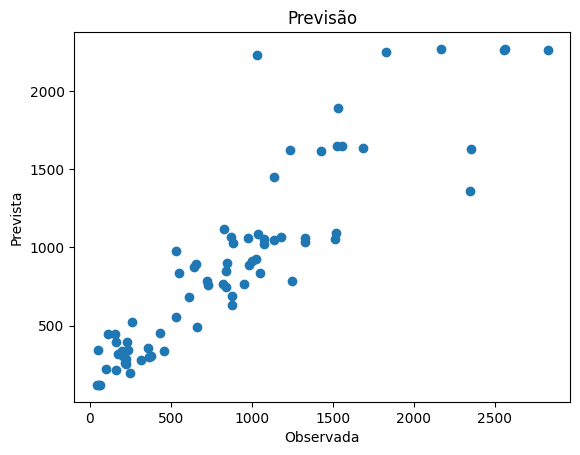

In [92]:
import matplotlib.pyplot as plt


# Visualizar as previsões
plt.scatter(y_test, y_pred)
plt.xlabel("Observada")
plt.ylabel("Prevista")
plt.title("Previsão")
plt.show()

In [93]:
import joblib


joblib.dump(model, 'modelo_treinado.joblib')

['modelo_treinado.joblib']